<center>
        <h1>Homework 4</h1>
        <h2> Naira Maria Barseghyan</h2>
</center>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import random
from operator import itemgetter
import matplotlib.pyplot as plt
from infomap import Infomap
from networkx.algorithms.community import greedy_modularity_communities

### 1. Create a Directed graph

In [2]:
directed_graph = nx.read_edgelist("./connections.txt",
                    create_using=nx.DiGraph(),
                    nodetype = int)
print(" Directed graph with\n", 
      'Number of nodes:', len(directed_graph.nodes),'\n',
      'Number of edges:', len(directed_graph.edges))

 Directed graph with
 Number of nodes: 4039 
 Number of edges: 88234


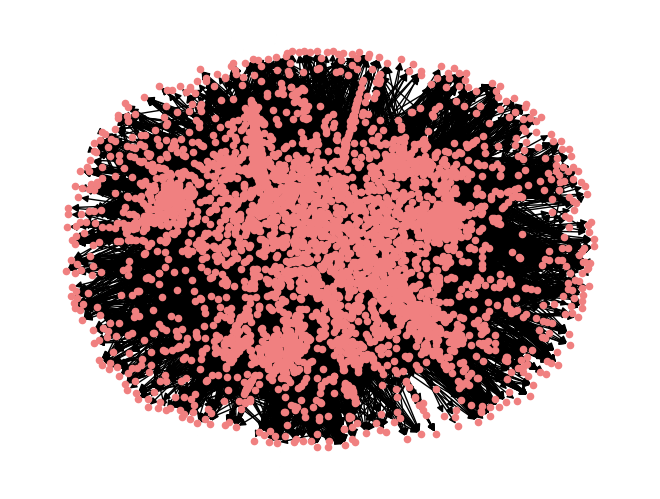

In [3]:
nx.draw(directed_graph, with_labels=False, node_size=20, node_color='lightcoral')
plt.show()

### 2. Show which nodes are bridges.

In [6]:
bridges = list(nx.bridges(directed_graph.to_undirected()))
print(set(itertools.chain(*bridges)))

{0, 2569, 11, 12, 15, 18, 1560, 2079, 2596, 37, 550, 43, 1581, 3650, 1096, 585, 74, 602, 1119, 607, 608, 613, 107, 3183, 624, 114, 1145, 3709, 638, 3729, 2195, 1684, 668, 3230, 674, 3748, 686, 692, 1206, 698, 209, 210, 3798, 215, 2269, 3820, 3853, 3856, 2842, 287, 801, 292, 1834, 335, 348, 3935, 358, 1386, 875, 3437, 883, 1912, 3451, 891, 3453, 892, 3974, 3980, 911, 3984, 918, 2457, 414, 2470, 4008, 4010, 4015, 4022, 4024, 1466, 447, 4035, 3031, 3570, 3071}


### 3. Show the density of the graph. Comment about your findings

In [7]:
print("The density: {}".format(nx.density(directed_graph)))

The density: 0.0054099817517196435


The desnity value is relativeley small which indicates that there are relatively small amount of edges compared to the possible number of edges.
nodes in the graph have limited connections, we can have more connections. Low density also can indicate about existince of communities in the graph, where nodes have higher connections withing communities and have relatively small communities outside of communities.

### 4. Show which nodes have the highest and lowest number of connections.

In [8]:
def find_extreme_nodes(graph, top: int, type):

    node_in_degree_connections = dict(directed_graph.in_degree())
    node_out_degree_connections = dict(directed_graph.out_degree())
    node_total_connections = {key: node_in_degree_connections[key] + node_out_degree_connections[key] for key in node_in_degree_connections}
    
    if type == "in":
        highest_connections = sorted(node_in_degree_connections.items(), key=lambda x: x[1], reverse=True)[:top]
        lowest_connections = sorted(node_in_degree_connections.items(), key=lambda x: x[1])[:top]
    elif type == "out":
        highest_connections = sorted(node_out_degree_connections.items(), key=lambda x: x[1], reverse=True)[:top]
        lowest_connections = sorted(node_out_degree_connections.items(), key=lambda x: x[1])[:top]
    elif type == "total":
        highest_connections = sorted(node_total_connections.items(), key=lambda x: x[1], reverse=True)[:top]
        lowest_connections = sorted(node_total_connections.items(), key=lambda x: x[1])[:top]
    else:
        raise ValueError("Invalid type. Use 'in', 'out' or 'total'.")
    
    return highest_connections, lowest_connections
        

In [9]:
highest_total_connections, lowest_total_connections = find_extreme_nodes(directed_graph,3,'total')
print("Nodes with the highest number of connections:")
for node, value in highest_total_connections:
    print(f"Node: {node}, number of connections: {value}")
print("\nNodes with the lowest number of connections:")
for node, value in lowest_total_connections:
    print(f"Node: {node}, number of connections: {value}")

Nodes with the highest number of connections:
Node: 107, number of connections: 1045
Node: 1684, number of connections: 792
Node: 1912, number of connections: 755

Nodes with the lowest number of connections:
Node: 11, number of connections: 1
Node: 12, number of connections: 1
Node: 15, number of connections: 1


### 5. Show which nodes have the highest incoming and outgoing connections

In [10]:
highest_in_connections, lowest_in_connections = find_extreme_nodes(directed_graph,3,'in')
print("Nodes with the highest number of incoming connections:")
for node, value in highest_in_connections:
    print(f"Node: {node}, number of connections: {value}")
print("\nNodes with the lowest number of incoming connections:")
for node, value in lowest_in_connections:
    print(f"Node: {node}, number of connections: {value}")

Nodes with the highest number of incoming connections:
Node: 1888, number of connections: 251
Node: 2543, number of connections: 246
Node: 1800, number of connections: 216

Nodes with the lowest number of incoming connections:
Node: 0, number of connections: 0
Node: 686, number of connections: 0
Node: 1, number of connections: 1


In [11]:
highest_out_connections, lowest_out_connections = find_extreme_nodes(directed_graph,3,'out')
print("Node with the highest number of outgoing connections:")
for node, value in highest_out_connections:
    print(f"Node: {node}, number of connections: {value}")
print("\nNode with the lowest number of outgoing connections:")
for node, value in lowest_out_connections:
    print(f"Node: {node}, number of connections: {value}")


Node with the highest number of outgoing connections:
Node: 107, number of connections: 1043
Node: 1684, number of connections: 778
Node: 1912, number of connections: 748

Node with the lowest number of outgoing connections:
Node: 11, number of connections: 0
Node: 12, number of connections: 0
Node: 15, number of connections: 0


### 6. Show which nodes have the highest closeness, betweenness, and eigenvector | Interpret your findings

In [41]:
closeness_centrality = dict(nx.closeness_centrality(directed_graph))
betweenness_centrality = dict(nx.betweenness_centrality(directed_graph))
eigenvector_centrality = dict(nx.eigenvector_centrality(directed_graph, max_iter=500))

In [42]:
def find_max_centrality(centrality_mesure: dict, top: int):
    highest_centrlity_nodes = sorted(centrality_mesure.items(), key=lambda x: x[1], reverse=True)[:top]
    return highest_centrlity_nodes

In [43]:
highest_closeness = find_max_centrality(closeness_centrality, 3)
highest_betweenness = find_max_centrality(betweenness_centrality, 3)
highest_eigenvector = find_max_centrality(eigenvector_centrality, 3)

In [44]:
print("Nodes with the highest closeness centrality:")
for node, value in highest_closeness:
    print(f"Node: {node}, Closeness Centrality: {value}")


Nodes with the highest closeness centrality:
Node: 2642, Closeness Centrality: 0.11797503012816456
Node: 2649, Closeness Centrality: 0.11793232689533308
Node: 2629, Closeness Centrality: 0.11629338421878259


Closness centrality shows the nodes that are clossest to the other nodes. Closness centrality shows the nodes that can effivtiveley communicate with other nodes. The identified nodes can serve as hubs for information transfer to other nodes.

In [16]:
print("Nodes with the highest betweenness centrality:")
for node, value in highest_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {value}")


Nodes with the highest betweenness centrality:
Node: 1684, Betweenness Centrality: 0.03299985344063623
Node: 1912, Betweenness Centrality: 0.027145672353148857
Node: 1718, Betweenness Centrality: 0.026577614223444346


Betweenes centralith shows the nodes who act as a bridge between ifferent parts if the network. These nodes are important for maintaining grpah conectiity. These nodes ensure connection between different communities and can be used to transfer information from one community to the other.

In [17]:
print("Nodes with the highest eigenvector centrality:")
for node, value in highest_eigenvector:
    print(f"Node: {node}, Eigenvector Centrality: {value}")

Nodes with the highest eigenvector centrality:
Node: 2655, Eigenvector Centrality: 0.802704299670652
Node: 2654, Eigenvector Centrality: 0.47986846225069096
Node: 2646, Eigenvector Centrality: 0.22755258082041144


Eignevector centrality shows the nodes that are well connected to the nodes who also have high number of connections. These nodes shows influence among other influential nodes. This nodes suggest importance in community. This nodes can be used for transfering information with influencers of specific communities. 

### 7. Implement a community detection algorithm on the directed graph and show how many communities were created.

In [4]:
communities = list(greedy_modularity_communities(directed_graph))

In [5]:
print(f"Number of Communities: {len(communities)}")

Number of Communities: 11


### 8.Show the largest and the smallest community. | Interpret your findings

In [6]:
largest_community = max(communities, key=len)
smallest_community = min(communities, key=len)

In [7]:
print(f"Largest Community size: {len(largest_community)} nodes")
print(f"Smallest Community size: {len(smallest_community)} nodes")

Largest Community size: 1001 nodes
Smallest Community size: 6 nodes


We found that the biggest community consists of 1001 nodes. This is the most important part of the network. Large communities indicate tightly connected groups where nodes have many connections with each other. This can indicate a geographical region, or other higly connected group.



The smallest community we found has 6 nodes. This indicates a small group with small number of connections, whoch can represent a niche or specialized segment within the network.

### 9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.

In [8]:
top1_largest_community = directed_graph.subgraph(communities[0])
top2_largest_community = directed_graph.subgraph(communities[1])
top3_largest_community = directed_graph.subgraph(communities[2])

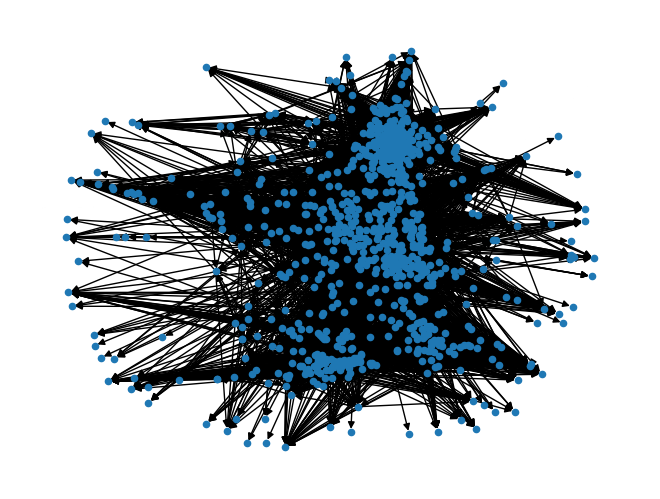

In [30]:
nx.draw(top1_largest_community, with_labels=False, node_size=20, node_color='lightcoral')
plt.show()

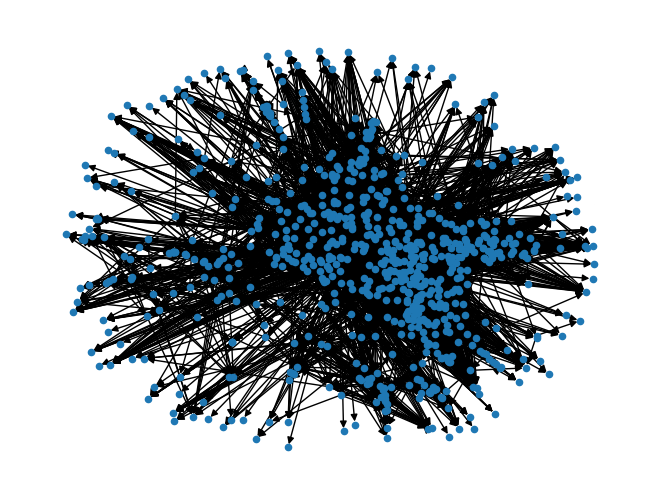

In [31]:
nx.draw(top2_largest_community, with_labels=False, node_size=20, node_color='lightcoral')
plt.show()

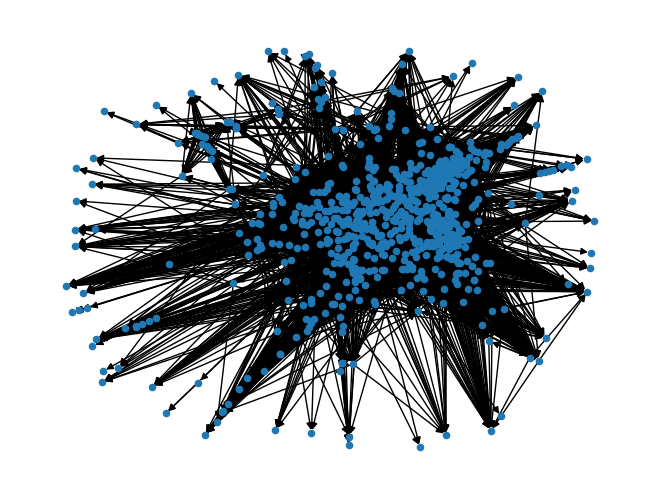

In [32]:
nx.draw(top3_largest_community, with_labels=False, node_size=20, node_color='lightcoral')
plt.show()

In [32]:
degree_centrality_top1 = nx.degree_centrality(top1_largest_community)
top3_degree_nodes_community1 = sorted(degree_centrality_top1, key=degree_centrality_top1.get, reverse=True)[:3]

closeness_centrality_top1 = nx.closeness_centrality(top1_largest_community)
top_closeness_nodes_community1 = sorted(closeness_centrality_top1, key=closeness_centrality_top1.get, reverse=True)[:3]

betweenness_centrality_top1 = nx.betweenness_centrality(top1_largest_community)
top_betweenness_nodes_community1 = sorted(betweenness_centrality_top1, key=betweenness_centrality_top1.get, reverse=True)[:3]

eigenvector_centrality_top1 = nx.eigenvector_centrality(top1_largest_community, max_iter=1000, tol=1e-6)
top_eigenvector_nodes_community1 = sorted(eigenvector_centrality_top1, key=eigenvector_centrality_top1.get, reverse=True)[:3]


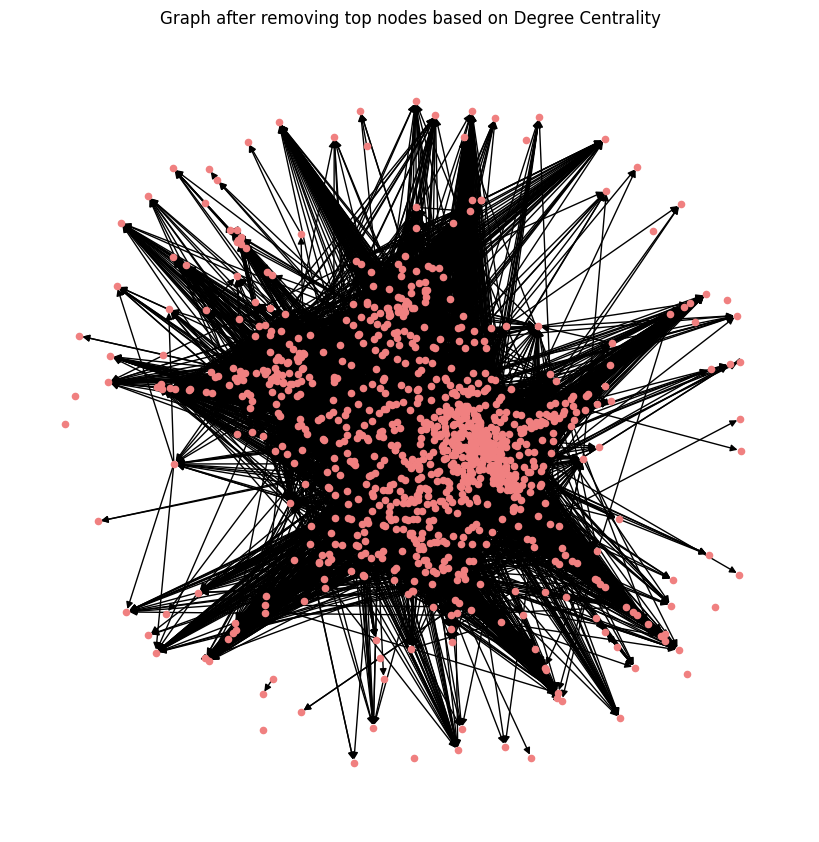

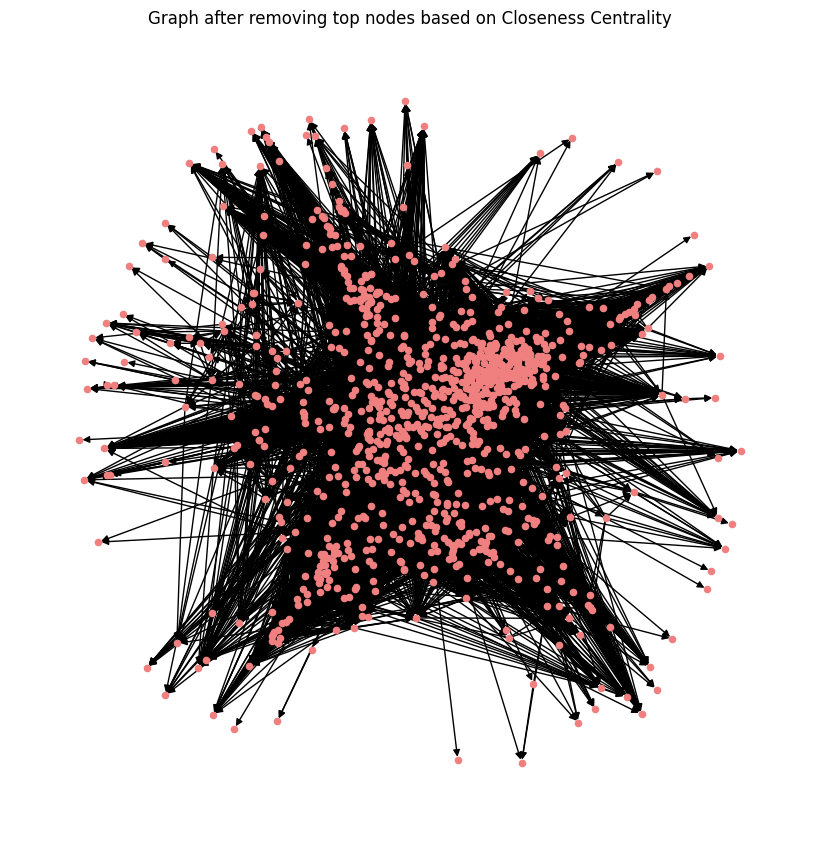

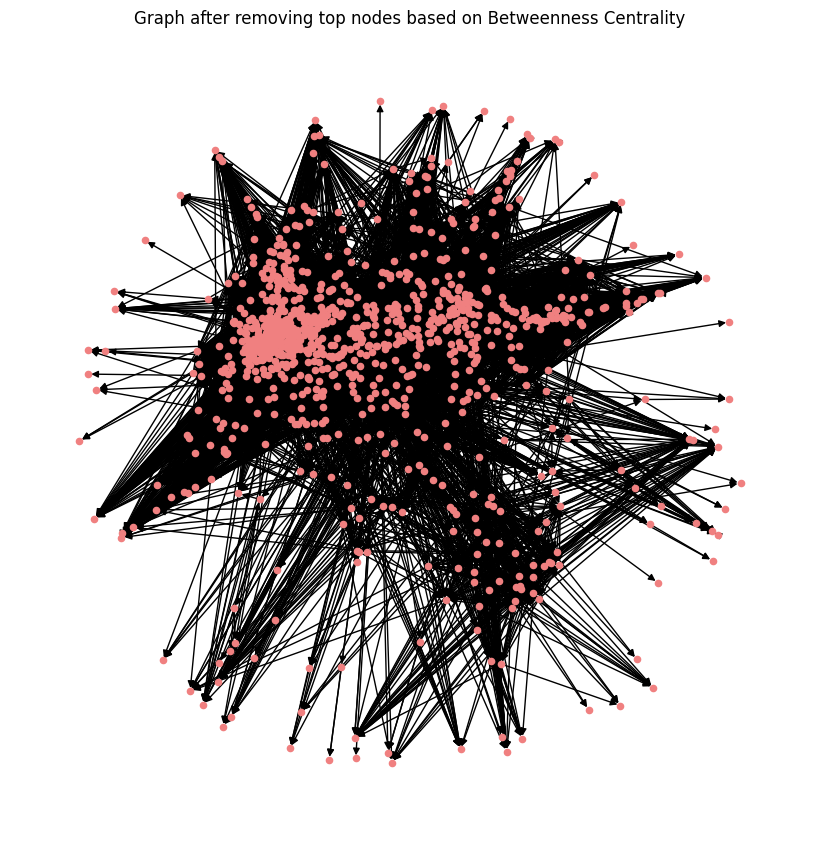

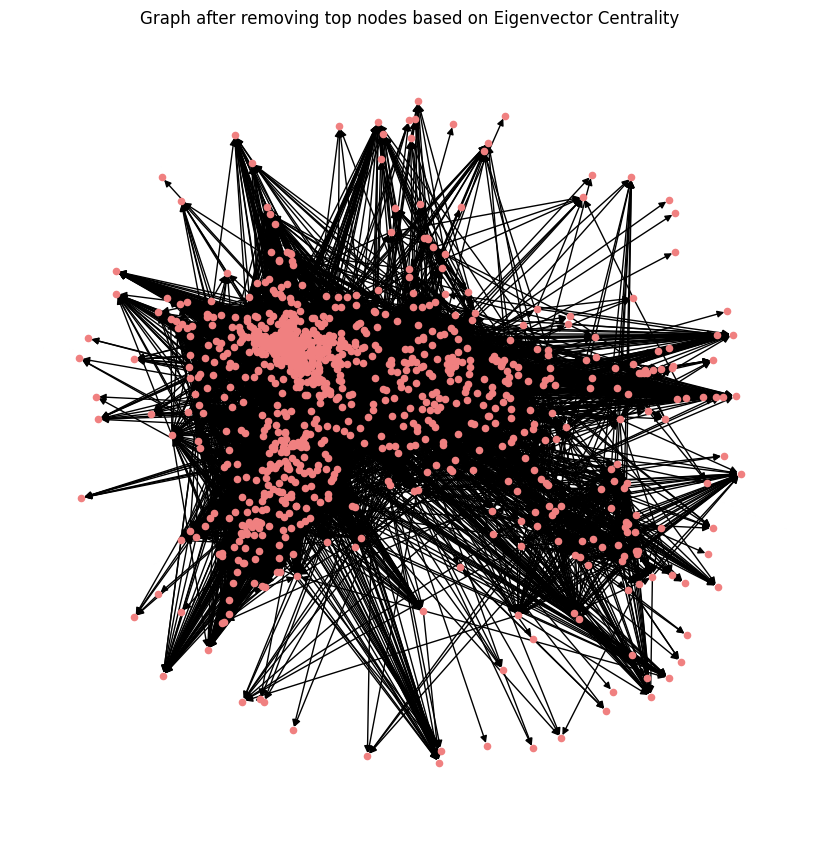

In [33]:
for top_nodes, centrality_measure in zip([top3_degree_nodes_community1, top_closeness_nodes_community1, top_betweenness_nodes_community1, top_eigenvector_nodes_community1],
                     ["Degree Centrality", "Closeness Centrality", "Betweenness Centrality", "Eigenvector Centrality"]):
    top_nodes_set = set(top_nodes)
    plt.figure(figsize=(8, 8))
    updated_graph = top1_largest_community.copy()
    updated_graph.remove_nodes_from(top_nodes_set)
    nx.draw(updated_graph, with_labels=False, node_size=20, node_color='lightcoral')
    plt.title(f"Graph after removing top nodes based on {centrality_measure}")
    plt.show()

In [34]:
degree_centrality_top2 = nx.degree_centrality(top2_largest_community)
top3_degree_nodes_community2 = sorted(degree_centrality_top2, key=degree_centrality_top2.get, reverse=True)[:3]

closeness_centrality_top2 = nx.closeness_centrality(top2_largest_community)
top_closeness_nodes_community2 = sorted(closeness_centrality_top2, key=closeness_centrality_top2.get, reverse=True)[:3]

betweenness_centrality_top2 = nx.betweenness_centrality(top2_largest_community)
top_betweenness_nodes_community2 = sorted(betweenness_centrality_top2, key=betweenness_centrality_top2.get, reverse=True)[:3]

eigenvector_centrality_top2 = nx.eigenvector_centrality(top2_largest_community, max_iter=1000, tol=1e-6)
top_eigenvector_nodes_community2 = sorted(eigenvector_centrality_top2, key=eigenvector_centrality_top2.get, reverse=True)[:3]


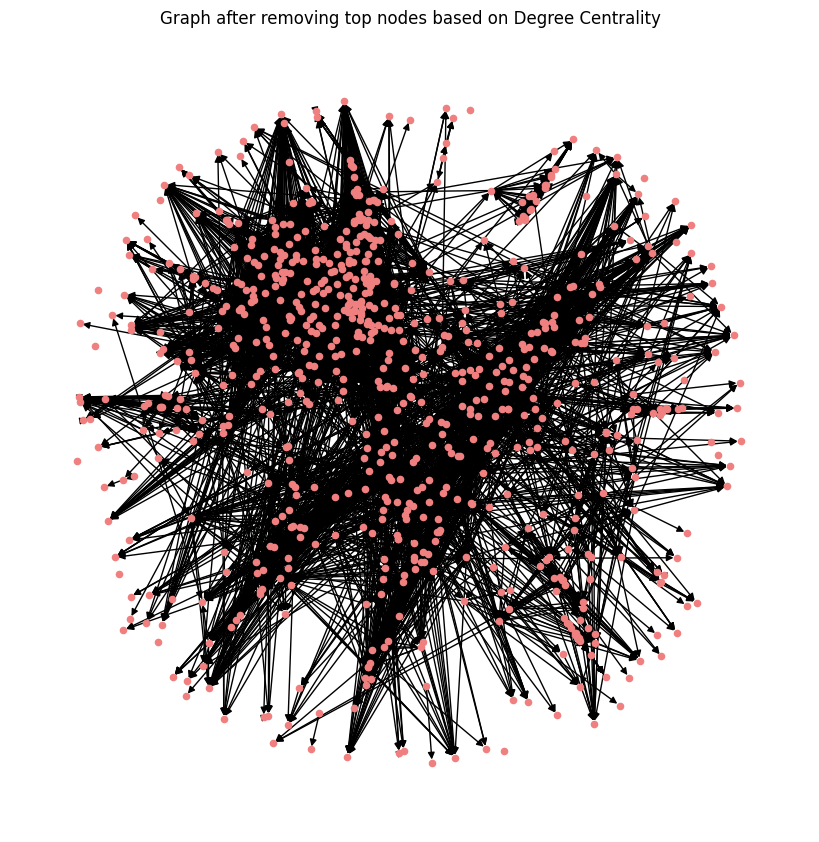

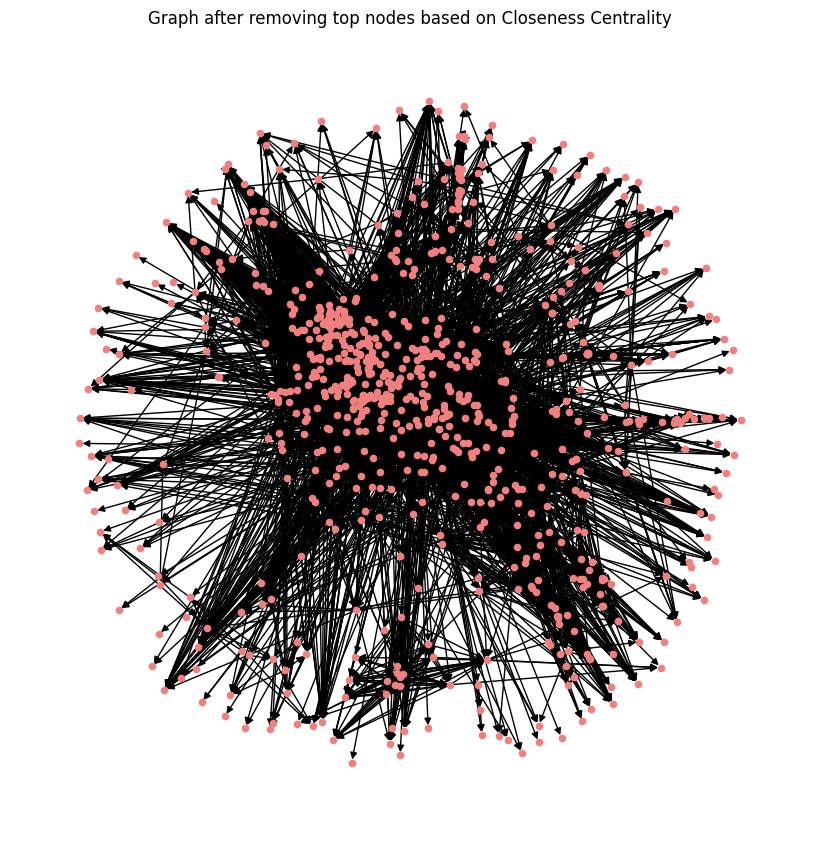

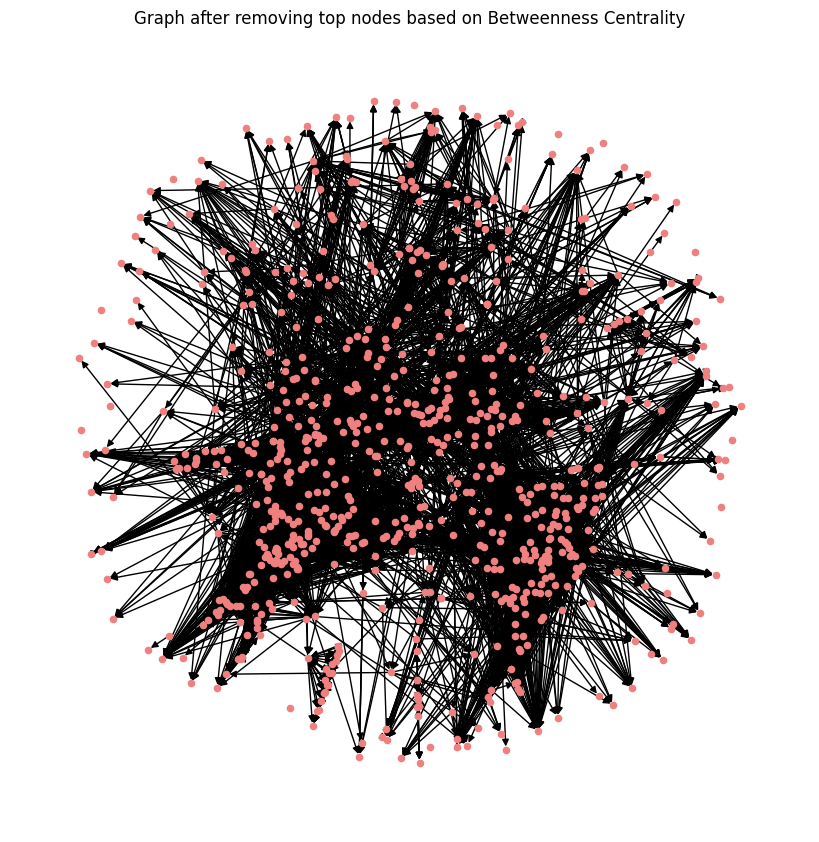

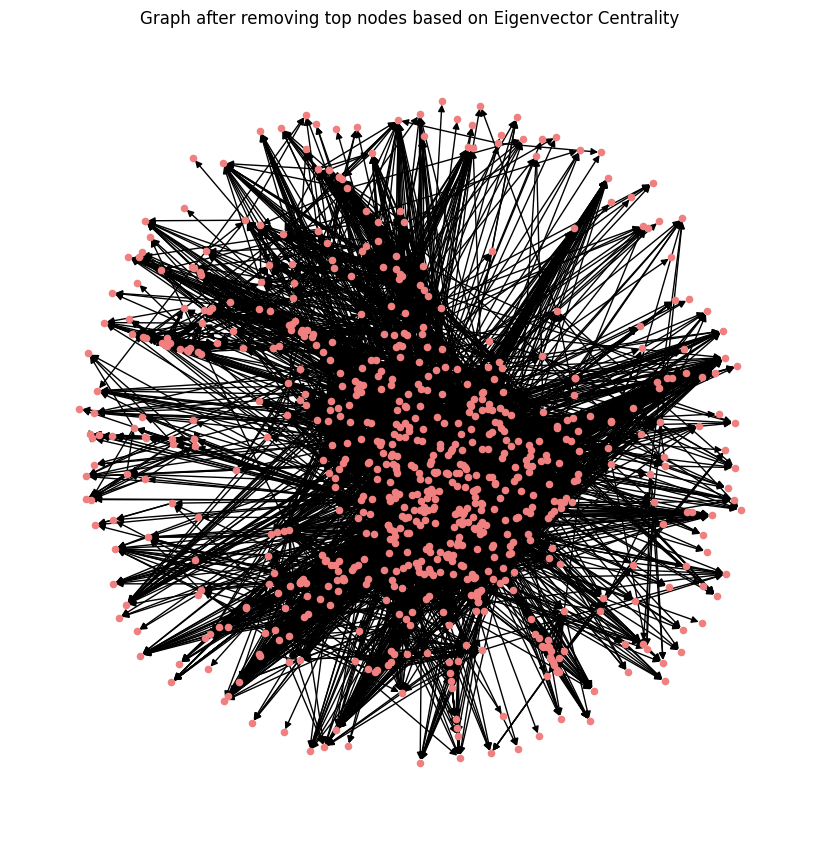

In [35]:
for top_nodes, centrality_measure in zip([top3_degree_nodes_community2, top_closeness_nodes_community2, top_betweenness_nodes_community2, top_eigenvector_nodes_community2],
                     ["Degree Centrality", "Closeness Centrality", "Betweenness Centrality", "Eigenvector Centrality"]):
    top_nodes_set = set(top_nodes)
    plt.figure(figsize=(8, 8))
    updated_graph = top2_largest_community.copy()
    updated_graph.remove_nodes_from(top_nodes_set)
    nx.draw(updated_graph, with_labels=False, node_size=20, node_color='lightcoral')
    plt.title(f"Graph after removing top nodes based on {centrality_measure}")
    plt.show()

In [36]:
degree_centrality_top3 = nx.degree_centrality(top3_largest_community)
top3_degree_nodes_community3 = sorted(degree_centrality_top3, key=degree_centrality_top3.get, reverse=True)[:3]

closeness_centrality_top3 = nx.closeness_centrality(top3_largest_community)
top_closeness_nodes_community3 = sorted(closeness_centrality_top3, key=closeness_centrality_top3.get, reverse=True)[:3]

betweenness_centrality_top3 = nx.betweenness_centrality(top3_largest_community)
top_betweenness_nodes_community3 = sorted(betweenness_centrality_top3, key=betweenness_centrality_top3.get, reverse=True)[:3]

eigenvector_centrality_top3 = nx.eigenvector_centrality(top3_largest_community, max_iter=1000, tol=1e-6)
top_eigenvector_nodes_community3 = sorted(eigenvector_centrality_top3, key=eigenvector_centrality_top3.get, reverse=True)[:3]


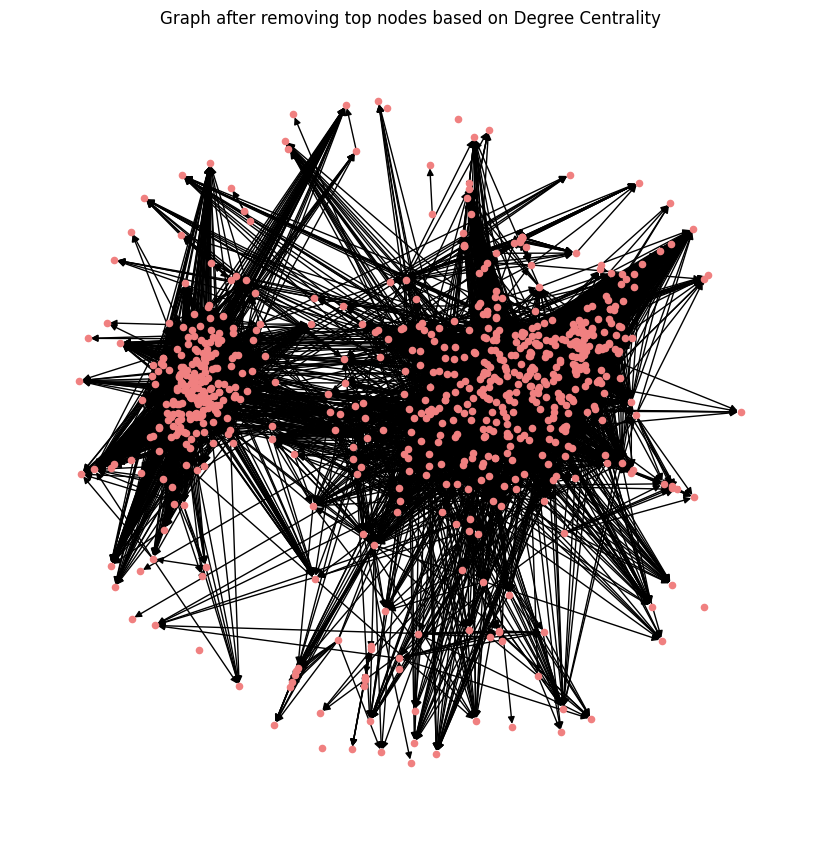

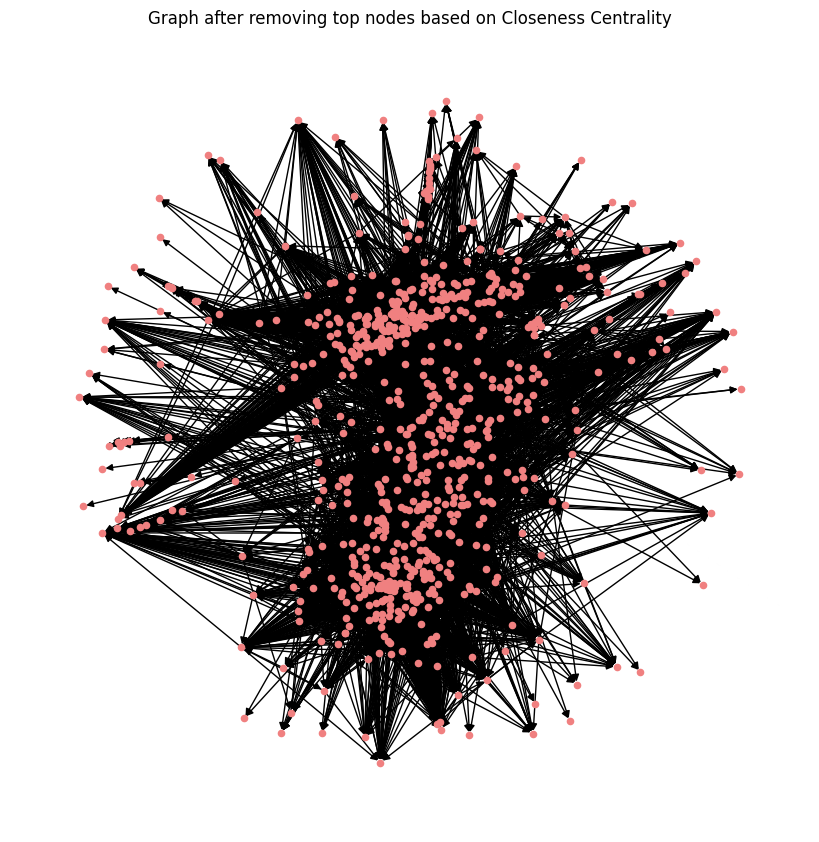

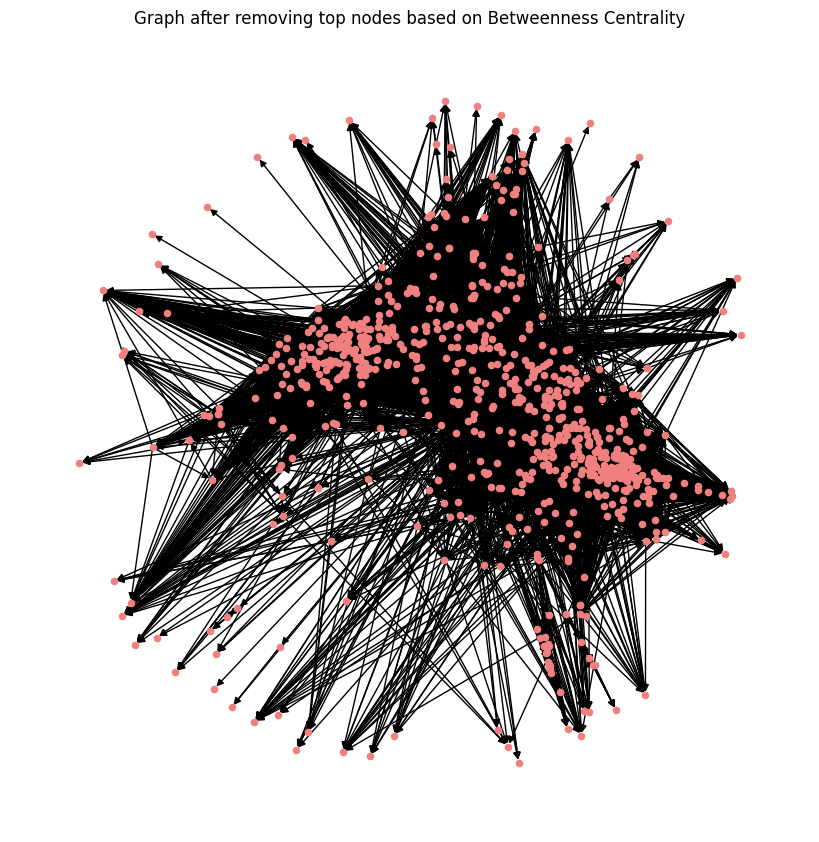

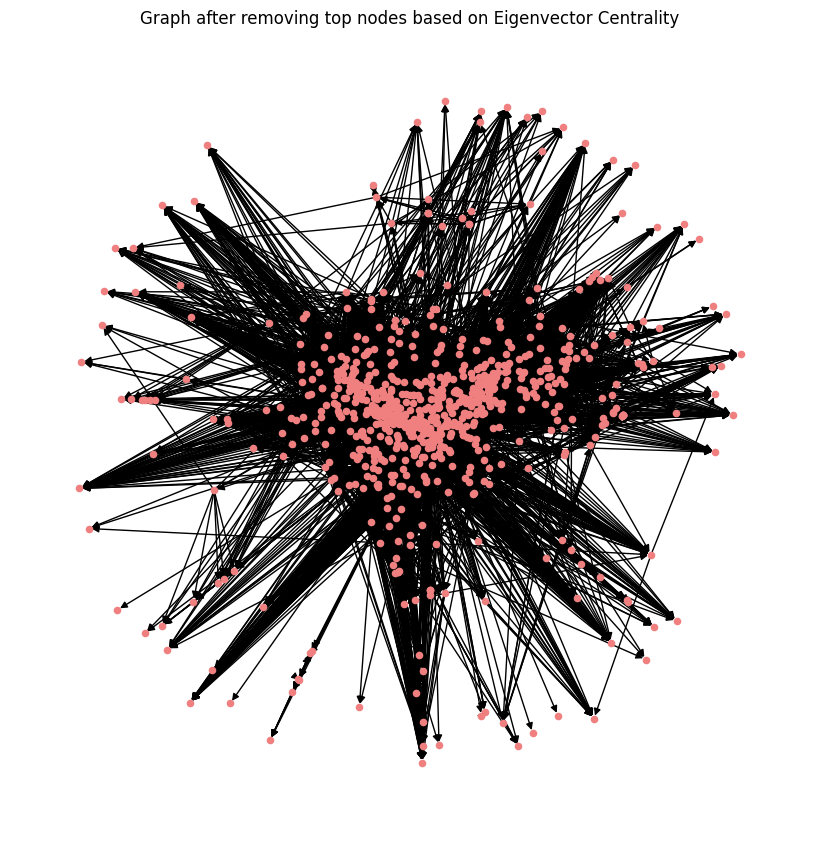

In [37]:
for top_nodes, centrality_measure in zip([top3_degree_nodes_community3, top_closeness_nodes_community3, top_betweenness_nodes_community3, top_eigenvector_nodes_community3],
                     ["Degree Centrality", "Closeness Centrality", "Betweenness Centrality", "Eigenvector Centrality"]):
    top_nodes_set = set(top_nodes)
    plt.figure(figsize=(8, 8))
    updated_graph = top3_largest_community.copy()
    updated_graph.remove_nodes_from(top_nodes_set)
    nx.draw(updated_graph, with_labels=False, node_size=20, node_color='lightcoral')
    plt.title(f"Graph after removing top nodes based on {centrality_measure}")
    plt.show()

### 10. Draw the influencers of those top 3 communities.

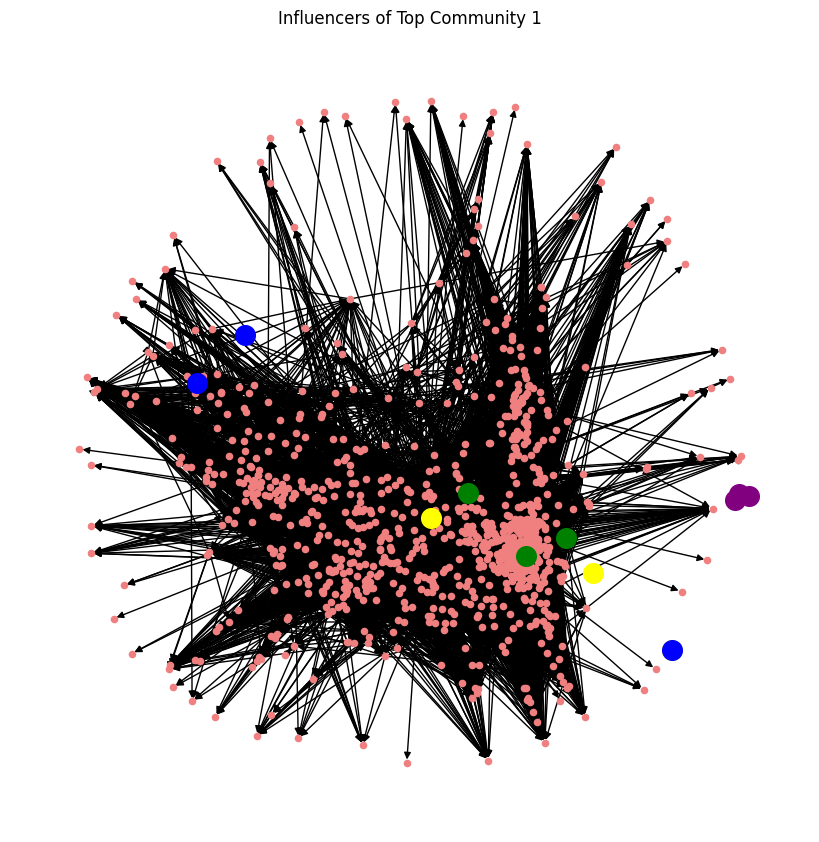

In [38]:
plt.figure(figsize=(8, 8))
nx.draw(top1_largest_community, with_labels=False, node_size=20, node_color='lightcoral')
pos = nx.spring_layout(top1_largest_community)
nx.draw_networkx_nodes(top1_largest_community, pos, nodelist=top3_degree_nodes_community1, node_color='yellow', node_size=200, label='Degree Centrality')
nx.draw_networkx_nodes(top1_largest_community, pos, nodelist=top_closeness_nodes_community1, node_color='blue', node_size=200, label='Closeness Centrality')
nx.draw_networkx_nodes(top1_largest_community, pos, nodelist=top_betweenness_nodes_community1, node_color='green', node_size=200, label='Betweenness Centrality')
nx.draw_networkx_nodes(top1_largest_community, pos, nodelist=top_eigenvector_nodes_community1, node_color='purple', node_size=200, label='Eigenvector Centrality')
plt.title(f"Influencers of Top Community 1")
plt.show()

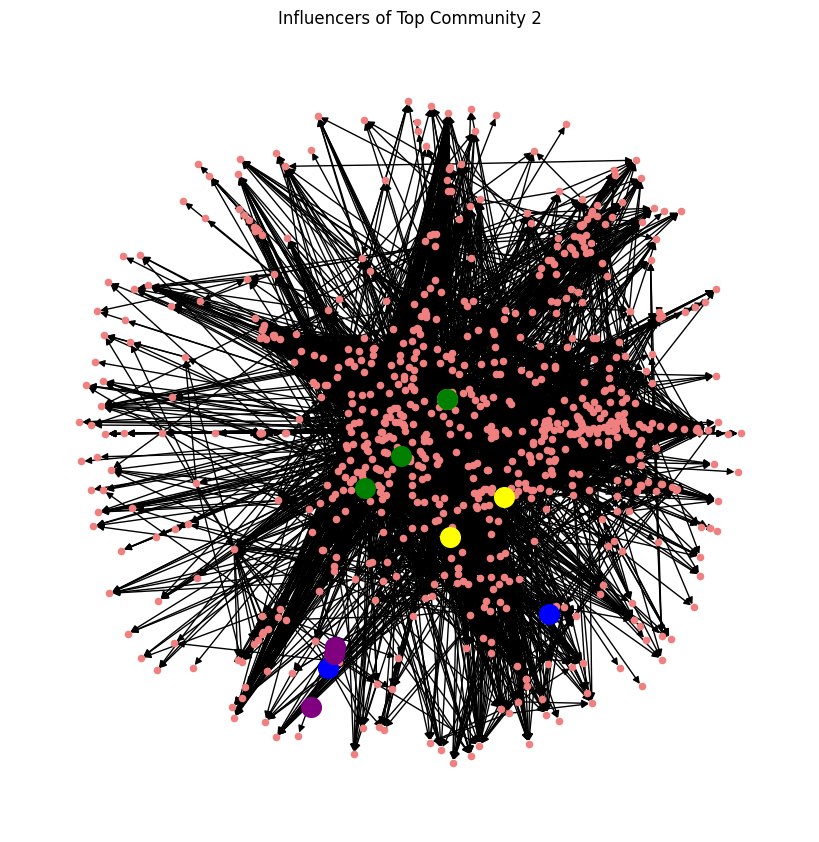

In [39]:
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(top2_largest_community)
nx.draw(top2_largest_community, with_labels=False, node_size=20, node_color='lightcoral')
nx.draw_networkx_nodes(top2_largest_community, pos, nodelist=top3_degree_nodes_community2, node_color='yellow', node_size=200, label='Degree Centrality')
nx.draw_networkx_nodes(top2_largest_community, pos, nodelist=top_closeness_nodes_community2, node_color='blue', node_size=200, label='Closeness Centrality')
nx.draw_networkx_nodes(top2_largest_community, pos, nodelist=top_betweenness_nodes_community2, node_color='green', node_size=200, label='Betweenness Centrality')
nx.draw_networkx_nodes(top2_largest_community, pos, nodelist=top_eigenvector_nodes_community2, node_color='purple', node_size=200, label='Eigenvector Centrality')
plt.title(f"Influencers of Top Community 2")
plt.show()

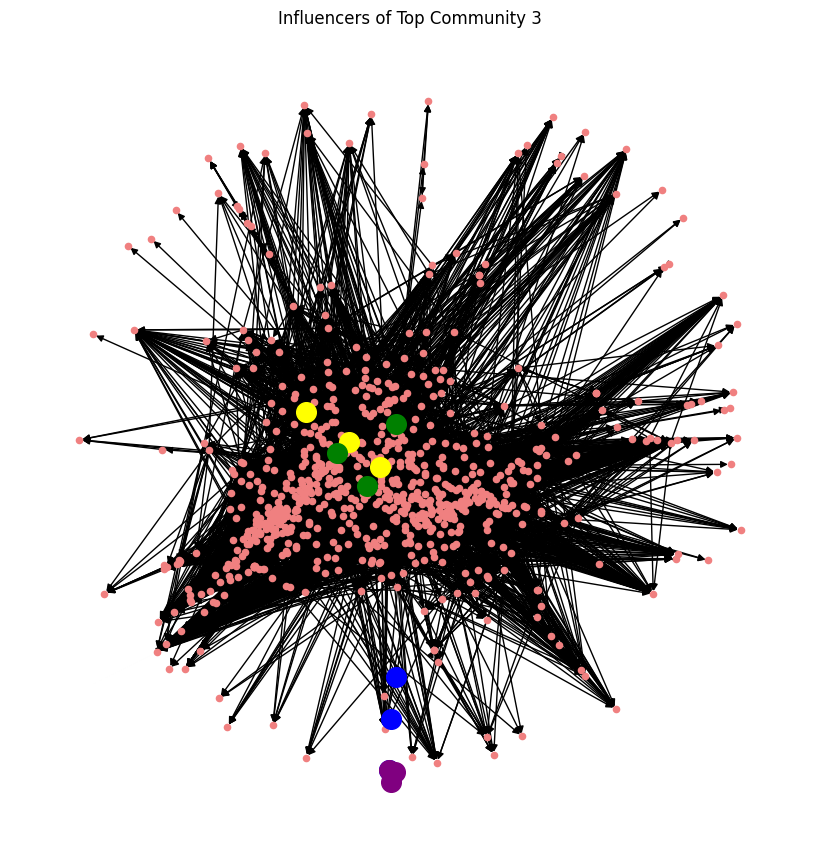

In [40]:
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(top3_largest_community)
nx.draw(top3_largest_community, with_labels=False, node_size=20, node_color='lightcoral')
nx.draw_networkx_nodes(top3_largest_community, pos, nodelist=top3_degree_nodes_community3, node_color='yellow', node_size=200, label='Degree Centrality')
nx.draw_networkx_nodes(top3_largest_community, pos, nodelist=top_closeness_nodes_community3, node_color='blue', node_size=200, label='Closeness Centrality')
nx.draw_networkx_nodes(top3_largest_community, pos, nodelist=top_betweenness_nodes_community3, node_color='green', node_size=200, label='Betweenness Centrality')
nx.draw_networkx_nodes(top3_largest_community, pos, nodelist=top_eigenvector_nodes_community3, node_color='purple', node_size=200, label='Eigenvector Centrality')
plt.title(f"Influencers of Top Community 3")
plt.show()

## 11. Design an action plan:
#### a. Use hypothetical business (telecom, marketing agency, etc.)
For Hypothethical business we will use a Telecome company working in Armenia
#### b. b. Use a hypothetical marketing budget
For a budget dedicated for marketing we will take 1.000.000 AMD in one month
and more specifically we will say that 250.000 is for intenet advertisment,
500.000 is for TV advertisment,
and 250.000 is for Real-life advertisment, lets say banners.

#### c. c. Use a hypothetical cost per action (advertisement cost)
We will asume that cost per click on the internet is 1USD (approx. 400 AMD)
Cost for One banner is 30.000 AMD
and cost for one TV advertisment is 60.000 AMD

#### d. d. Decide whom should you target?
Based on SN Analysis we performed we will idnetifiy communities and influencers in the communities using metrics such as Degree Centrality, Closeness Centrality etc.
- 1) Find out who are Influencers. 
- 2) Try to make closer connection with the influencers. For example if influencers in the community are blogers we can try to buy advertisments from them. Other example can be business owners as an influencers. To business owners we can suggest special plans for the employees of the business.
- 3) Suggest referral programs for influencers in community. This way we will ensure that influencers will stay interested in promoting our company.
- 4) Find out specific characteristics of a community. Target that community using relevant communcitaion channels(TV, internet, radio). Target that community using relevant advertisment for specific community(for example more call minutes ofr business people.)
- 5) With the help of community seperation we will have more detailed characteristics of specific clients and will be able to use better
targeting techniques and promotion plans.

# End